In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#Question 1
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
fx=np.array([10.0, 16.30, 23.0, 27.5, 31.0, 35.6, 39.0, 41.5, 42.9, 45.0, 46.0, 45.5, 46.0, 49.0, 50.0])

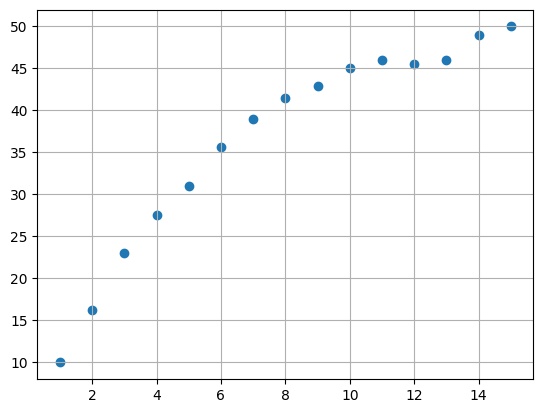

In [3]:
plt.scatter(x,fx)
plt.grid()
plt.show()

In [4]:
def sum(x):
    s = 0
    for i in x:
        s += i
    return s
def cal_mean(x):
    n = len(x)
    s = sum(x)
    return s/n

x_mean = cal_mean(x)
fx_mean = cal_mean(fx)
print(f" x_mean = {x_mean}, fx_mean = {fx_mean}")

 x_mean = 8.0, fx_mean = 36.55333333333333


In [5]:
sum(x)

120

In [6]:
def slop(x, fx):
    n = len(x)
    x_sum = sum(x)
    fx_sum = sum(fx)
    x2 = []
    for i in x:
        x2.append(i**2)
    x2_sum = sum(x2)
    x_fx = []
    for i in range(n):
        x_fx.append(x[i] * fx[i])
    x_fx_sum = sum(x_fx)
    return ((n * x_fx_sum) - (x_sum * fx_sum))/((n * x2_sum) - (x_sum ** 2))

def inter(x,fx):
    x_mean = cal_mean(x)
    y_mean = cal_mean(fx)
    return y_mean - (slop(x,fx) * x_mean)    

In [7]:
slop(x,fx)

2.610357142857143

In [8]:
inter(x,fx)

15.670476190476183

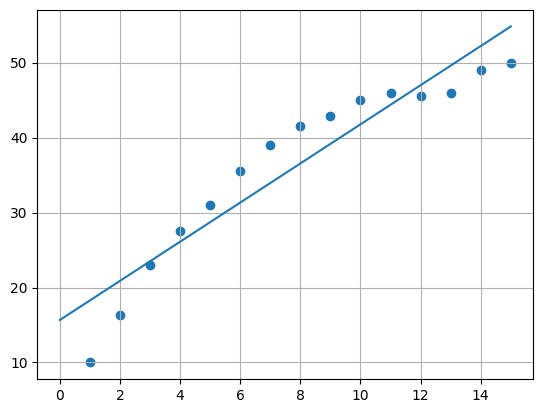

In [9]:
plt.scatter(x,fx)
x1 = np.linspace(0, 15, 200)
y = inter(x,fx) + slop(x,fx) * x1
plt.plot(x1,y)
plt.grid()
plt.show()

In [10]:
def Sr(x,fx):
    s = 0
    for i in range(len(x)):
        s += (fx[i] - inter(x,fx) - (slop(x,fx) * x[i])) **2
    return s

def St(x,fx):
    s = 0
    for i in range(len(fx)):
        s += (fx[i] - cal_mean(fx)) ** 2
    return s

def r2(x,fx):
    return (St(x,fx) - Sr(x,fx)) / St(x,fx)

In [11]:
Sr(x,fx)

241.10729761904759

In [12]:
St(x,fx)

2149.017333333333

In [13]:
r2(x,fx)

0.8878057920337632

In [14]:
#Question 2
x = np.array([0.4, 0.8, 1.2, 1.6, 2, 2.3])
fx = np.array([900, 1075, 1600, 2050, 3000, 3700])

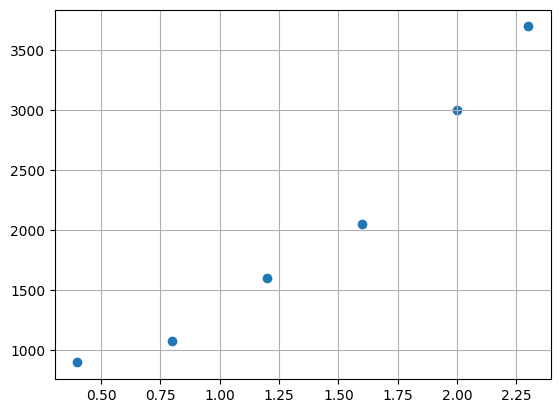

In [15]:
plt.scatter(x,fx)
plt.grid()
plt.show()

In [16]:
fx_log = []
for i in fx:
    fx_log.append(np.log(i))
fx_log = np.array(fx_log)
fx_log

array([6.80239476, 6.98007594, 7.37775891, 7.62559507, 8.00636757,
       8.2160881 ])

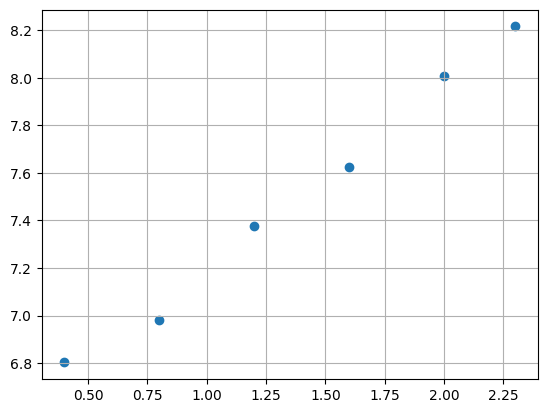

In [17]:
plt.scatter(x,fx_log)
plt.grid()
plt.show()

In [18]:
print(f"x_mean = {cal_mean(x)}, fx_log_mean = {cal_mean(fx_log)}")

x_mean = 1.3833333333333335, fx_log_mean = 7.501380058421494


In [19]:
slop(x,fx_log)

0.7696733828706417

In [20]:
inter(x,fx_log)

6.436665212117106

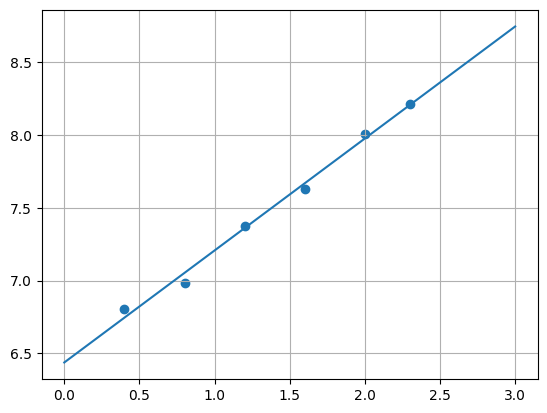

In [21]:
plt.scatter(x,fx_log)
x1 = np.linspace(0, 3, 200)
y = inter(x,fx_log) + slop(x,fx_log) * x1
plt.plot(x1,y)
plt.grid()
plt.show()

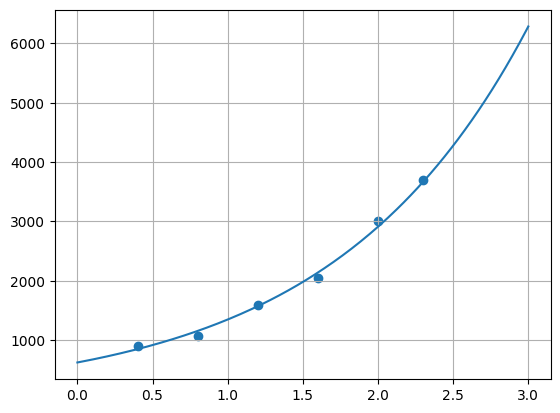

In [22]:
plt.scatter(x,fx)
x1 = np.linspace(0, 3, 200)
y = inter(x,fx_log) + slop(x,fx_log) * x1
plt.plot(x1,np.exp(y))
plt.grid()
plt.show()

In [23]:
Sr(x,fx_log)

0.011700806670434506

In [24]:
St(x,fx_log)

1.5568699516850688

In [25]:
r2(x,fx_log)

0.9924844033005004

In [26]:
# question 3
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
fx=np.array([10.0, 16.30, 23.0, 27.5, 31.0, 35.6, 39.0, 41.5, 42.9, 45.0, 46.0, 45.5, 46.0, 49.0, 50.0])

In [27]:
def k_x(x, pow):
    s = 0
    for i in x:
        s += (i**pow)
    return s

In [28]:
def k_xy(x,y,pow):
    s = 0
    for i in range(len(x)):
        s += (y[i] * (x[i]**pow))
    return s

In [29]:
mat = np.zeros((3,3))
mat[0,0] = len(x)
for i in range(3):
    for j in range(3):
        if i ==0 and j == 0:
            pass
        k = i+j
        mat[i,j] = k_x(x, k)

b = np.zeros((3,1))
for i in range(3):
    b[i] = k_xy(x,fx,i)


In [30]:
mat

array([[1.50000e+01, 1.20000e+02, 1.24000e+03],
       [1.20000e+02, 1.24000e+03, 1.44000e+04],
       [1.24000e+03, 1.44000e+04, 1.78312e+05]])

In [31]:
b

array([[  548.3],
       [ 5117.3],
       [56066.7]])

In [32]:
def naive_gauss_elim(m, b1): 
    n, n = m.shape  
    for i in range(n-1):
        for j in range(i+1,n):
            fact = m[j,i]/m[i,i]
            for k in range(i,n):
                m[j,k] = m[j,k] - fact * m[i,k]
            b1[j] = b1[j] - fact * b1[i]
    return m, b1

def backward(mat,b):
        n, _ = mat.shape
        x = np.zeros((n,1))
        for i in range(n):
                x[n-1-i] = (b[n-1-i] - np.dot(mat[n-1-i, n-i:] ,x[n-i:])) / mat[n-1-i, n-1-i]
        return x

In [33]:
mat_2, b_2 = naive_gauss_elim(mat,b)

In [34]:
mat_2

array([[  15.        ,  120.        , 1240.        ],
       [   0.        ,  280.        , 4480.        ],
       [   0.        ,    0.        , 4125.33333333]])

In [35]:
b_2

array([[ 548.3       ],
       [ 730.9       ],
       [-953.83333333]])

In [36]:
a = backward(mat_2, b_2)

In [37]:
a

array([[ 5.18879121],
       [ 6.30977537],
       [-0.23121364]])

In [38]:
print(f"Polynomial => f(x) = {a[2]} x^2 + {a[1]} x + {a[0]}")

Polynomial => f(x) = [-0.23121364] x^2 + [6.30977537] x + [5.18879121]
